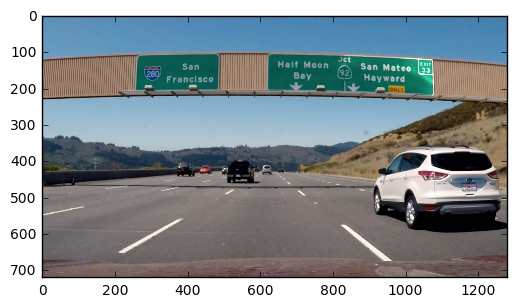

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image and grayscale it
image = mpimg.imread('./calibration_wide/signs_vehicles_xygrad.jpg')

plt.imshow(image)

In [2]:

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    
    # Convert to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take derivative
    if orient=='x':
        sobel_drv = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient=='y':
        sobel_drv = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    else:
        print("Invalid Orient, provide orient either x or y")
        
    abs_sobel_drv = np.absolute(sobel_drv)
    
    scale_sobel = np.uint8(255*abs_sobel_drv/np.max(abs_sobel_drv))
    
    binary_output = np.zeros_like(scale_sobel)
    
    binary_output[ (scale_sobel>thresh_min) & (scale_sobel<=thresh_max)] = 1 
    
    return binary_output
    


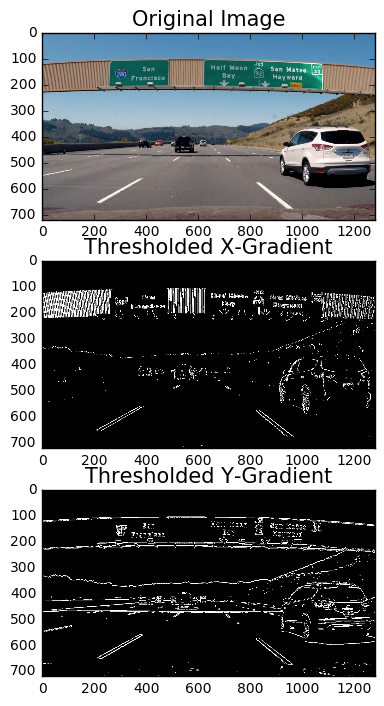

In [14]:
# Run the function
gradx = abs_sobel_thresh(image, orient='x', thresh_min=30, thresh_max=100)
grady = abs_sobel_thresh(image, orient='y', thresh_min=30, thresh_max=100)

# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7))
f.tight_layout()

# Original Image
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=15)

# X-Gradient Image
ax2.imshow(gradx, cmap='gray')
ax2.set_title('Thresholded X-Gradient', fontsize=15)

# Y-Gradient Image
ax3.imshow(grady, cmap='gray')
ax3.set_title('Thresholded Y-Gradient', fontsize=15)


#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)